In [100]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

from scipy import stats
from scipy.stats import f_oneway


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sma
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, accuracy_score, f1_score, cohen_kappa_score
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# 1. Read the dataset and view the first 10 rows of it.

df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
#2. Check the shape/dimension of the dataset
df.shape

(5110, 12)

In [4]:
#3. Check for the missing values.Display number of missing values per column.
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
#4. Investigate and predict the missing BMI Value.
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [6]:
df[df['bmi'].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


The skewness of bmi is  1.0553402052962912


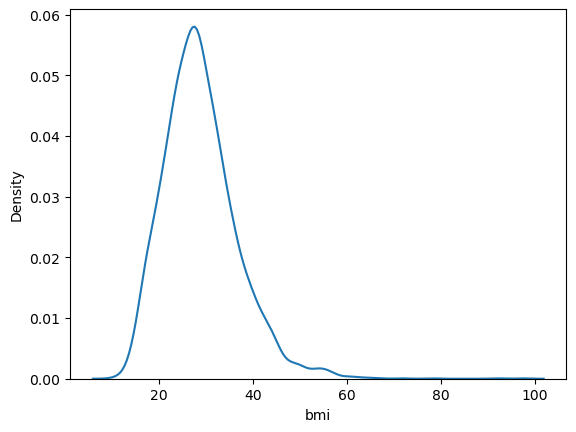

In [7]:
sns.kdeplot(df.bmi)
print('The skewness of bmi is ',df.bmi.skew())
plt.show()

In [8]:
# As bmi is right skewed filling null values by median
df.bmi=df.bmi.fillna(df['bmi'].median())
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
# 5. Check the datatype, number of non null values and name of each variable in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [11]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [12]:
# 6. Check the descriptive statistics of the dataset.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.862035,7.699562,10.30,23.800,28.100,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


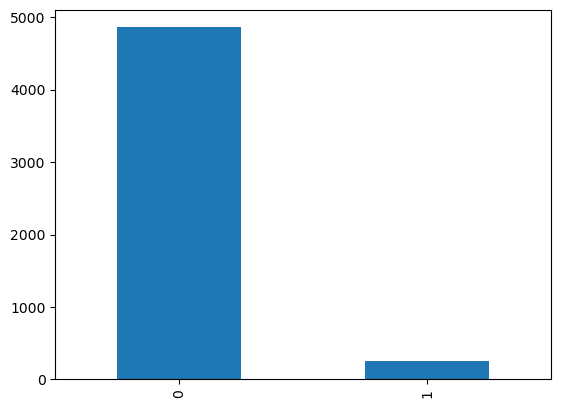

In [13]:
# 7. Visualize the proportion of Stroke samples in the dataset.
df.stroke.value_counts().plot(kind = 'bar')
plt.show()

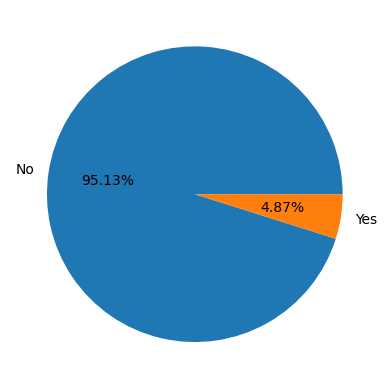

In [14]:
plt.pie(df.stroke.value_counts(),autopct ='%.2f%%' ,labels = ['No','Yes'])
plt.show()

Inference:
The dataset is imbalanced .Proper treatment is needed .

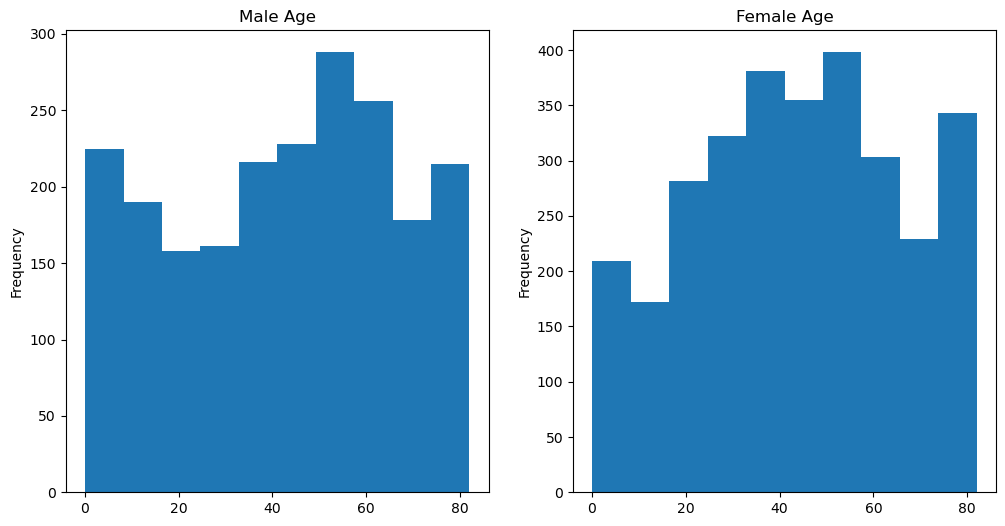

In [15]:
#8. Visualize the Distribution of Male and Female Ages. Write the Observation.
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
df[df.gender == 'Male']['age'].plot(kind = 'hist',title = 'Male Age',ax = axs[0])
df[df.gender == 'Female']['age'].plot(kind = 'hist',title = 'Female Age', ax = axs[1])
plt.show()

Observations

1. Almost equal number of samples are taken from both male and female gender Age groups.

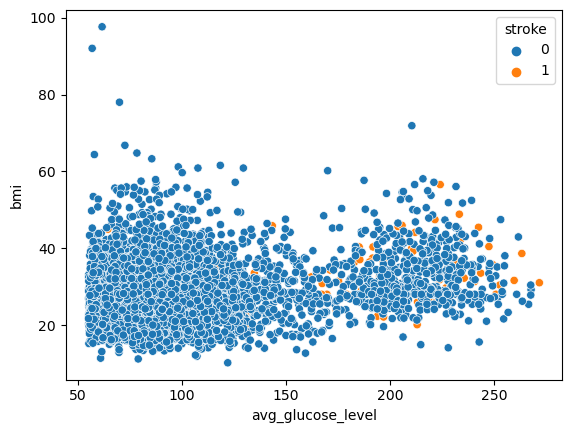

In [16]:
# 9.Visualize the stroke sample based on
# a) BMI and Glucose Level

sns.scatterplot(hue = df.stroke, x = df.avg_glucose_level,y = df.bmi)
plt.show()

Observations

1. As the average glucose level increases, there is a noticeable rise in the occurrence of strokes among some individuals.

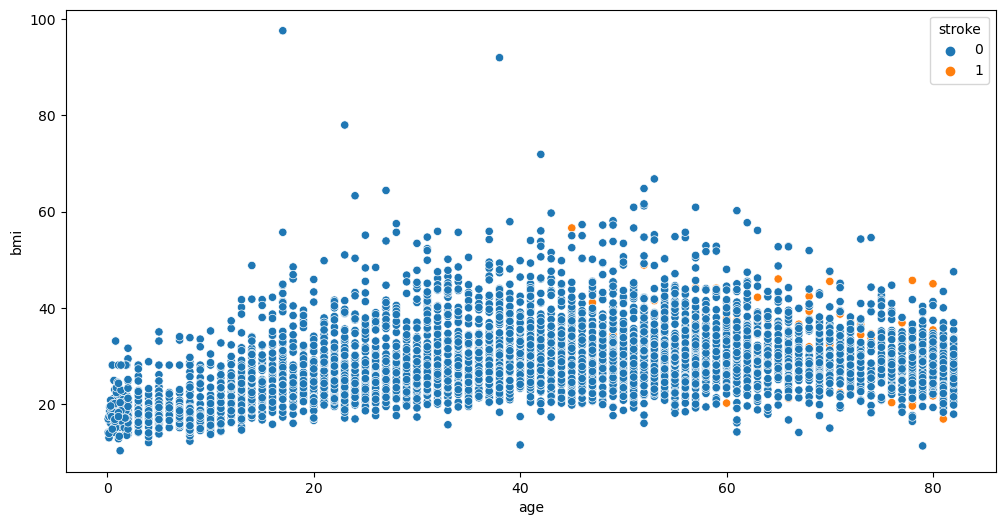

In [17]:
# 10.Visualize the stroke sample based on
# b) BMI and Age

plt.figure(figsize=(12,6))
sns.scatterplot(hue = df.stroke, x = df.age,y = df.bmi)
plt.show()

Observations

1. As age increases, the risk of having a stroke rises significantly among some individuals.

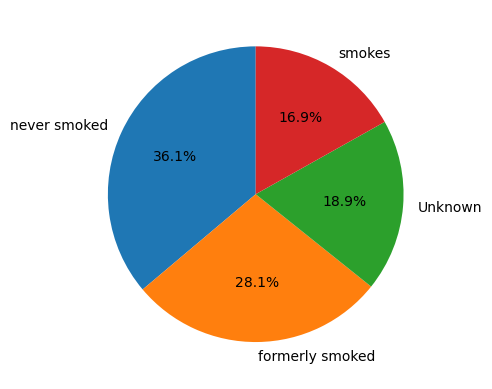

In [18]:
#11. Using the pie chart visualizes the proportion of different smoking categories among the stroke population.

stroke_smoking_counts = df[df.stroke == 1]['smoking_status'].value_counts()
stroke_smoking_counts

plt.pie(stroke_smoking_counts,labels=stroke_smoking_counts.index, autopct='%1.1f%%', startangle=90)
plt.show()

In [19]:
#12. Perform hypothesis testing to find the significant variables.

In [20]:
# Numerical columns
num_cols=df.select_dtypes(include=np.number)

# hypothesis testing between stroke feature and other numerical features
# H0: Both groups have equal mean indicating that they are insignificant.
# H1: Both groups do not have equal mean indicating that they are significant.

significant_features=[]
for i in num_cols:
    if i !='stroke':
        pvalue=stats.ttest_ind(df[i],df.stroke)[1]
        if pvalue<0.05:
            print(i,pvalue)
            significant_features.append(i)
        else:
            print(i,pvalue)
            
print('The significant_features are\n ',significant_features)

id 0.0
age 0.0
hypertension 2.4828630276395242e-21
heart_disease 0.22637221796027793
avg_glucose_level 0.0
bmi 0.0
The significant_features are
  ['id', 'age', 'hypertension', 'avg_glucose_level', 'bmi']


In [21]:
# categorical column
cat_cols=df.select_dtypes(exclude=np.number)
cat_cols

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [22]:
# Define the groups based on unique values of gender, work_type, and smoking_status
gender_groups = df.groupby("gender")["stroke"]
work_type_groups = df.groupby("work_type")["stroke"]
smoking_status_groups = df.groupby("smoking_status")["stroke"]

# Perform the one-way ANOVA tests for each group
def perform_anova(group_data):
    f_stat, p_val = f_oneway(*[group_data.get_group(key) for key in group_data.groups])
    alpha = 0.05
    if p_val < alpha:
        print("The null hypothesis is rejected. There is significant evidence to support a difference in means.")
    else:
        print("The null hypothesis is not rejected. There is no significant evidence to support a difference in means.")

# Perform ANOVA for gender groups
print("Gender:")
perform_anova(gender_groups)

# Perform ANOVA for work_type groups
print("\nWork Type:")
perform_anova(work_type_groups)

# Perform ANOVA for smoking_status groups
print("\nSmoking Status:")
perform_anova(smoking_status_groups)


Gender:
The null hypothesis is not rejected. There is no significant evidence to support a difference in means.

Work Type:
The null hypothesis is rejected. There is significant evidence to support a difference in means.

Smoking Status:
The null hypothesis is rejected. There is significant evidence to support a difference in means.


In [23]:
#13. Drop the unnecessary columns.
df_data=df.drop('id',axis=1)
df_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [24]:
#14. Write the code to replace following categories columns in integer format as follow –
#a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)
#b) ever_married('Yes': 1, 'No': 0)
#c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)

# Replace categories in the work_type column
df_data["work_type"] = df_data["work_type"].replace({
    "Private": 0,
    "Self-employed": 1,
    "Govt_job": 2,
    "children": -1,
    "Never_worked": -2
})

# Replace categories in the ever_married column
df_data["ever_married"] = df_data["ever_married"].replace({
    "Yes": 1,
    "No": 0
})

# Replace categories in the smoking_status column
df_data["smoking_status"] = df_data["smoking_status"].replace({
    "never smoked": 0,
    "Unknown": 1,
    "formerly smoked": 2,
    "smokes": -1
})


In [25]:
# Encoding Residence_type variable
df_data['Residence_type']=df_data['Residence_type'].replace({'Urban':0,'Rural':1})
df_data.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,0,0,228.69,36.6,2,1
1,Female,61.0,0,0,1,1,1,202.21,28.1,0,1


In [26]:
df_data.gender.replace({'Female':1, 'Male': 0, 'Other': 2}, inplace = True)
df_data.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,0,228.69,36.6,2,1
1,1,61.0,0,0,1,1,1,202.21,28.1,0,1


The skewness of the bmi column is 1.0881872326442346


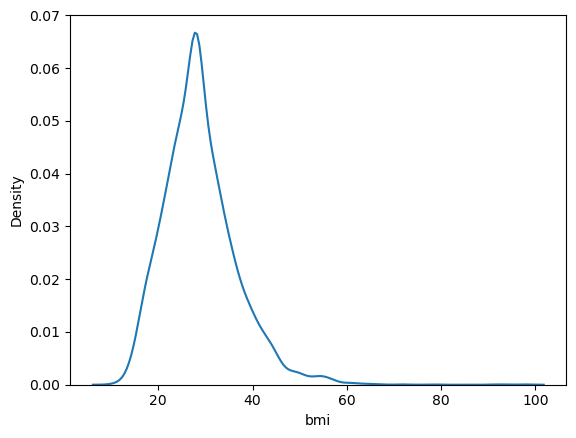

In [27]:
#15. Check the distribution of 'bmi' and 'stroke' columns in the dataset.
# distribution of 'bmi' 
sns.kdeplot(df_data['bmi'])
print('The skewness of the bmi column is',df_data.bmi.skew())
plt.show()

Skewness of BMI of class 0 is 1.095903631197483
Skewness of BMI of class 1 is 1.1275651326762677


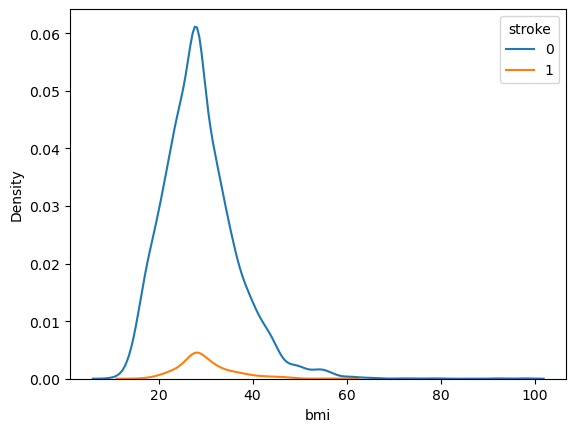

In [28]:
sns.kdeplot(df_data['bmi'],hue=df_data['stroke'])
print(f"Skewness of BMI of class 0 is {df_data.loc[df_data['stroke']==0,'bmi'].skew()}")
print(f"Skewness of BMI of class 1 is {df_data.loc[df_data['stroke']==1,'bmi'].skew()}")

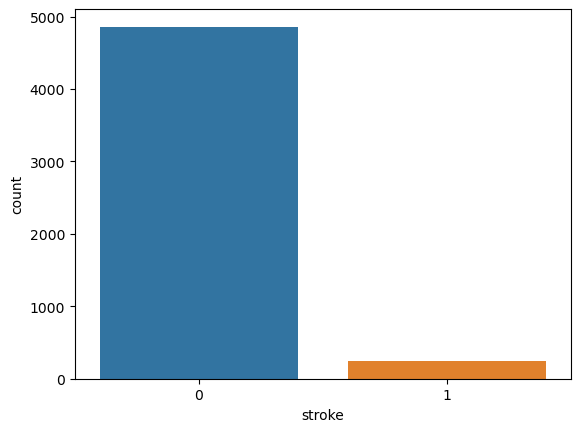

In [29]:
sns.countplot(x = df_data["stroke"])
plt.show()

In [30]:
#16. List down columns that are highly skewed.
highly_skewed=[]
for i in df_data.columns:
    if (df_data[i].skew()>0.5) | (df_data[i].skew()<-0.5):
        highly_skewed.append(i)
print('The highly_skewed columns are\n ',highly_skewed)

The highly_skewed columns are
  ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'avg_glucose_level', 'bmi', 'stroke']


In [31]:
#17. List down the columns that are highly kurtosis.

print(df_data.kurt()[(df_data.kurt() > 1) | (df_data.kurt() < -1)].index)

Index(['gender', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke'],
      dtype='object')


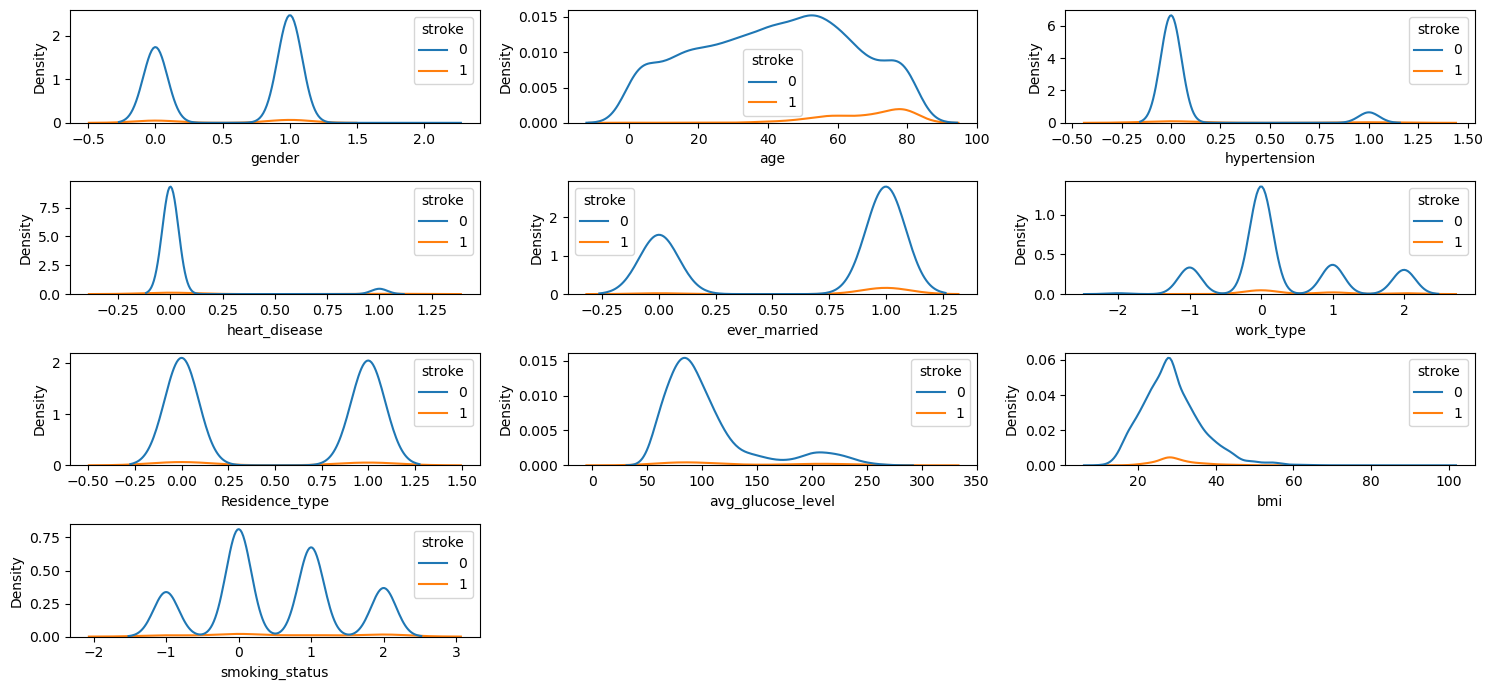

In [32]:
#18. Find the distribution of all variables with respect to the outcome 'stroke' variable.

cols=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
plt.figure(figsize=(15,7))
it=1
for i in cols:
    plt.subplot(4,3,it)
    sns.kdeplot(df_data[i],hue=df_data['stroke'])
    it+=1
plt.tight_layout()
plt.show()

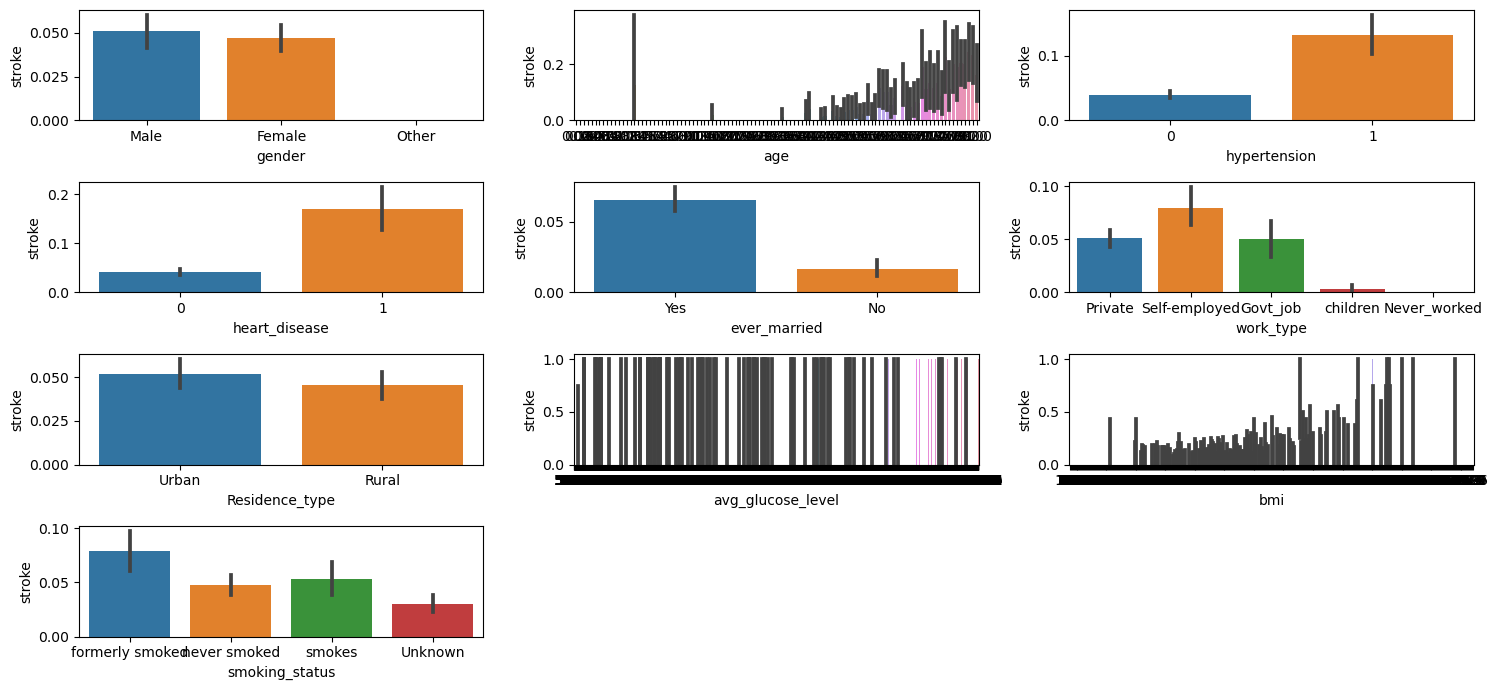

In [33]:
cols=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
plt.figure(figsize=(15,7))
it=1
for i in cols:
    plt.subplot(4,3,it)
    sns.barplot(df[i],df['stroke'])
    it+=1
plt.tight_layout()
plt.show()

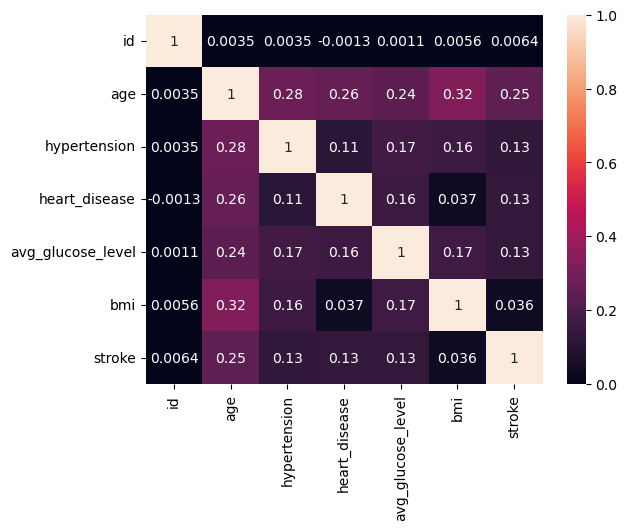

In [34]:
#19. Plot the heatmap for correlation matrix for the given dataset. Write the observation. Especially note down columns that are highly correlated (Positive or negative correlation, consider 0.7 to 1 as high)

sns.heatmap(df.corr(),annot=True)
plt.show()

Observations
1. No high correlation observed between the variables.
2. The highest correlation is 0.32 between age and bmi.
3. The next highest correlation is 0.28 between hypertension and age.
4. The "id" column shows high negative correlation with all other columns.
5. "heart_disease" and "stroke" in relation to "bmi" are negatively correlated.

In [35]:
#20. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio.
X = df_data.drop(columns = ['stroke'])
y = df_data['stroke']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3577, 10)
(1533, 10)
(3577,)
(1533,)


In [36]:
#21. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach to balanced the dataset by using the correct technique.
df_data.stroke.value_counts(normalize= True) * 100

0    95.127202
1     4.872798
Name: stroke, dtype: float64

In [37]:
from imblearn.over_sampling import SMOTE

# use SMOTE to generate synthetic samples for the minority class
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

print("Resampled dataset shape:",X_resampled.shape ,y_resampled.shape)

Resampled dataset shape: (9722, 10) (9722,)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.3, random_state=10)
print('xtrain:',X_train.shape,'xtest:',X_test.shape, sep = '\n' )

xtrain:
(6805, 10)
xtest:
(2917, 10)


In [56]:
#22. Model Selection/hyperparameter tuning
#- Try different models and fine tune their performance until you get the desired level of performance on the given dataset.
#Model Evaluation
#- Evaluate the models using appropriate evaluation metrics.

In [57]:
ss = StandardScaler()

ss.fit(X_train)

X_train = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns = X_test.columns)

print('New xtrain after smoting, transforming, scaling:',X_train.shape,
      'New xtest after smoting, transforming, scaling:',X_test.shape, sep = '\n')

y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

New xtrain after smoting, transforming, scaling:
(6805, 10)
New xtest after smoting, transforming, scaling:
(2917, 10)


In [58]:
# PowerTransformer
pt = PowerTransformer(method='yeo-johnson') 
X_train = pd.DataFrame(pt.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(pt.transform(X_test), columns=X_test.columns)

In [59]:
# statistical model of logistic regression

%time
logreg_stats_model = sma.Logit(y_train,sma.add_constant(X_train)).fit()

ypred_prob = logreg_stats_model.predict(sma.add_constant(X_test))

ypred_point5 = [0 if x < 0.5 else 1 for x in ypred_prob]

print('Summary:',logreg_stats_model.summary(),'_____________________________________________________________________________________',
      'Classification report with threshold of 0.5:', classification_report(y_test,ypred_point5), sep = '\n\n')


Wall time: 0 ns
Optimization terminated successfully.
         Current function value: 0.406043
         Iterations 7
Summary:

                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 6805
Model:                          Logit   Df Residuals:                     6794
Method:                           MLE   Df Model:                           10
Date:                Thu, 20 Jul 2023   Pseudo R-squ.:                  0.4142
Time:                        13:51:39   Log-Likelihood:                -2763.1
converged:                       True   LL-Null:                       -4716.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0006      0.035     -0.018      0.986      -

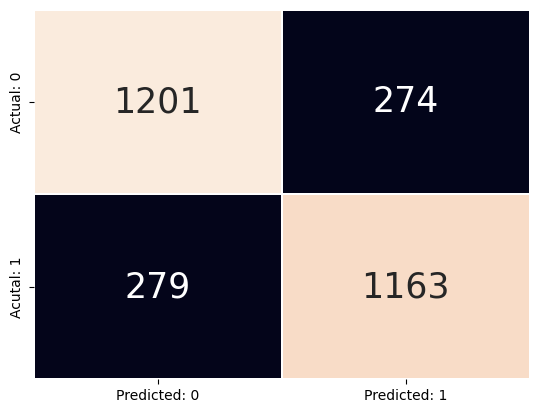

In [60]:
cm = confusion_matrix(y_test,ypred_point5)

conf_matrix = pd.DataFrame(cm, columns = ['Predicted: 0','Predicted: 1' ], index = ['Actual: 0','Acutal: 1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, linewidths= 0.1, 
           annot_kws= {'size':25})

plt.show()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.3, random_state=10)
print('xtrain:',X_train.shape,'xtest:',X_test.shape, sep = '\n' )

xtrain:
(6805, 10)
xtest:
(2917, 10)


In [70]:
performance_df = pd.DataFrame(columns = ['Name','Train_accuracy','Test_accuracy','Train_f1score',
                                        'Test_f1score','Train_Kappa','Test_Kappa'])


def model_performance(model , name , X_train = X_train, X_test = X_test):
    
    global performance_df
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    acc_train = accuracy_score(y_train , pred_train)
    acc_test = accuracy_score(y_test , pred_test)
    
    f1_train = f1_score(y_train , pred_train)
    f1_test = f1_score(y_test , pred_test)
    
    kappa_train = cohen_kappa_score(y_train , pred_train)
    kappa_test = cohen_kappa_score(y_test , pred_test)
    
    performance_df = performance_df.append({'Name':name ,
                                           'Train_accuracy': round(acc_train,2)*100,
                                           'Test_accuracy': round(acc_test,2)*100,
                                           'Train_f1score': f1_train,
                                           'Test_f1score': f1_test,
                                           'Train_Kappa': kappa_train,
                                           'Test_Kappa' : kappa_test}, ignore_index = True)
    
    print('Train report \n',classification_report(y_train , pred_train))
    print('Test report \n', classification_report(y_test , pred_test))


In [71]:
model_lr1 = LogisticRegression().fit(X_train , y_train)

model_performance(model_lr1, 'Base Model')

Train report 
               precision    recall  f1-score   support

           0       0.84      0.81      0.83      3386
           1       0.82      0.85      0.83      3419

    accuracy                           0.83      6805
   macro avg       0.83      0.83      0.83      6805
weighted avg       0.83      0.83      0.83      6805

Test report 
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      1475
           1       0.81      0.84      0.83      1442

    accuracy                           0.82      2917
   macro avg       0.83      0.83      0.82      2917
weighted avg       0.83      0.82      0.82      2917



In [72]:
performance_df

,Name,Train_accuracy,Test_accuracy,Train_f1score,Test_f1score,Train_Kappa,Test_Kappa
0,Base Model,83.0,82.0,0.833716,0.826131,0.659593,0.649745


In [75]:
model_dt = DecisionTreeClassifier().fit(X_train , y_train)
model_performance(model_dt , 'Decision Tree')

Train report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3386
           1       1.00      1.00      1.00      3419

    accuracy                           1.00      6805
   macro avg       1.00      1.00      1.00      6805
weighted avg       1.00      1.00      1.00      6805

Test report 
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      1475
           1       0.89      0.92      0.91      1442

    accuracy                           0.91      2917
   macro avg       0.91      0.91      0.91      2917
weighted avg       0.91      0.91      0.91      2917



In [80]:
model_rf = RandomForestClassifier().fit(X_train , y_train)
model_performance(model_rf , 'Random Forest')

Train report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3386
           1       1.00      1.00      1.00      3419

    accuracy                           1.00      6805
   macro avg       1.00      1.00      1.00      6805
weighted avg       1.00      1.00      1.00      6805

Test report 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1475
           1       0.93      0.95      0.94      1442

    accuracy                           0.94      2917
   macro avg       0.94      0.94      0.94      2917
weighted avg       0.94      0.94      0.94      2917



In [83]:
model_ab = AdaBoostClassifier().fit(X_train,y_train)
model_performance(model_ab , 'AdaBoost')

Train report 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      3386
           1       0.83      0.89      0.86      3419

    accuracy                           0.86      6805
   macro avg       0.86      0.86      0.86      6805
weighted avg       0.86      0.86      0.86      6805

Test report 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      1475
           1       0.83      0.89      0.86      1442

    accuracy                           0.85      2917
   macro avg       0.86      0.86      0.85      2917
weighted avg       0.86      0.85      0.85      2917



In [85]:
model_xgb = XGBClassifier().fit(X_train , y_train)
model_performance(model_xgb , 'XGBoost')

Train report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3386
           1       0.99      0.99      0.99      3419

    accuracy                           0.99      6805
   macro avg       0.99      0.99      0.99      6805
weighted avg       0.99      0.99      0.99      6805

Test report 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1475
           1       0.95      0.96      0.95      1442

    accuracy                           0.95      2917
   macro avg       0.95      0.95      0.95      2917
weighted avg       0.95      0.95      0.95      2917



In [87]:
gnb=GaussianNB()
gnb_model=gnb.fit(X_train,y_train)
model_performance(gnb_model , 'GaussianNB')

Train report 
               precision    recall  f1-score   support

           0       0.83      0.76      0.79      3386
           1       0.78      0.85      0.81      3419

    accuracy                           0.80      6805
   macro avg       0.81      0.80      0.80      6805
weighted avg       0.81      0.80      0.80      6805

Test report 
               precision    recall  f1-score   support

           0       0.82      0.77      0.79      1475
           1       0.78      0.83      0.80      1442

    accuracy                           0.80      2917
   macro avg       0.80      0.80      0.80      2917
weighted avg       0.80      0.80      0.80      2917



In [89]:
bnb=BernoulliNB()
bnb_model=bnb.fit(X_train,y_train)
model_performance(bnb_model , 'BernoulliNB')

Train report 
               precision    recall  f1-score   support

           0       0.68      0.63      0.65      3386
           1       0.66      0.70      0.68      3419

    accuracy                           0.67      6805
   macro avg       0.67      0.67      0.67      6805
weighted avg       0.67      0.67      0.67      6805

Test report 
               precision    recall  f1-score   support

           0       0.66      0.64      0.65      1475
           1       0.65      0.67      0.66      1442

    accuracy                           0.66      2917
   macro avg       0.66      0.66      0.66      2917
weighted avg       0.66      0.66      0.66      2917



In [91]:
kn=KNeighborsClassifier()
knn_model=kn.fit(X_train,y_train)
model_performance(knn_model , 'KNeighborsClassifier')

Train report 
               precision    recall  f1-score   support

           0       0.99      0.84      0.91      3386
           1       0.86      0.99      0.92      3419

    accuracy                           0.91      6805
   macro avg       0.92      0.91      0.91      6805
weighted avg       0.92      0.91      0.91      6805

Test report 
               precision    recall  f1-score   support

           0       0.98      0.79      0.87      1475
           1       0.82      0.98      0.89      1442

    accuracy                           0.89      2917
   macro avg       0.90      0.89      0.88      2917
weighted avg       0.90      0.89      0.88      2917



In [93]:
gb=GradientBoostingClassifier()
gb_model=gb.fit(X_train,y_train)
model_performance(gb_model , 'GradientBoostingClassifier')

Train report 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      3386
           1       0.88      0.92      0.90      3419

    accuracy                           0.90      6805
   macro avg       0.90      0.90      0.90      6805
weighted avg       0.90      0.90      0.90      6805

Test report 
               precision    recall  f1-score   support

           0       0.90      0.85      0.87      1475
           1       0.85      0.91      0.88      1442

    accuracy                           0.88      2917
   macro avg       0.88      0.88      0.88      2917
weighted avg       0.88      0.88      0.88      2917



In [96]:
bc=BaggingClassifier()
bc_model=bc.fit(X_train,y_train)
model_performance(bc_model , 'BaggingClassifier')

Train report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3386
           1       1.00      1.00      1.00      3419

    accuracy                           1.00      6805
   macro avg       1.00      1.00      1.00      6805
weighted avg       1.00      1.00      1.00      6805

Test report 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1475
           1       0.92      0.94      0.93      1442

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917



In [98]:
params = {'n_estimators' : [150 , 175 ,200],
         'criterion' : ['entropy' , 'gini'],
         'max_features' : [None, 'sqrt' , 'log']}

In [103]:
grid_rf = GridSearchCV(estimator = RandomForestClassifier() , param_grid = params , cv = 5).fit(X_train , y_train)
print(grid_rf.best_params_)
model_rf_tuned = grid_rf.best_estimator_.fit(X_train , y_train)
model_performance(model_rf_tuned , 'Random Forest tuned')

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 175}
Train report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3386
           1       1.00      1.00      1.00      3419

    accuracy                           1.00      6805
   macro avg       1.00      1.00      1.00      6805
weighted avg       1.00      1.00      1.00      6805

Test report 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      1475
           1       0.92      0.95      0.93      1442

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917



In [106]:
params = {'learning_rate' : [0.1,0.5,1.0,0.8],
         'n_estimators': [150,175,200]}

In [107]:
grid_xgb = GridSearchCV(estimator = XGBClassifier() , param_grid = params , cv = 5).fit(X_train , y_train)
print(grid_xgb.best_params_)
model_xgb_tuned = grid_xgb.best_estimator_.fit(X_train , y_train)
model_performance(model_xgb_tuned , 'XGB tuned')

{'learning_rate': 0.8, 'n_estimators': 150}
Train report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3386
           1       1.00      1.00      1.00      3419

    accuracy                           1.00      6805
   macro avg       1.00      1.00      1.00      6805
weighted avg       1.00      1.00      1.00      6805

Test report 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1475
           1       0.95      0.95      0.95      1442

    accuracy                           0.95      2917
   macro avg       0.95      0.95      0.95      2917
weighted avg       0.95      0.95      0.95      2917



In [108]:
performance_df

,Name,Train_accuracy,Test_accuracy,Train_f1score,Test_f1score,Train_Kappa,Test_Kappa
0,Base Model,83.0,82.0,0.833716,0.826131,0.659593,0.649745
1,Decision Tree,100.0,91.0,1.000000,0.906186,1.000000,0.810825
2,Random Forest,100.0,94.0,1.000000,0.939166,1.000000,0.877981
3,AdaBoost,86.0,85.0,0.862035,0.858289,0.713346,0.709497
4,XGBoost,99.0,95.0,0.992978,0.952644,0.985892,0.906062
5,GaussianNB,80.0,80.0,0.813033,0.804421,0.606869,0.599854
6,BernoulliNB,67.0,66.0,0.677822,0.656186,0.332036,0.310387
7,KNeighborsClassifier,91.0,89.0,0.919772,0.894704,0.826466,0.771479
8,GradientBoostingClassifier,90.0,88.0,0.898070,0.879542,0.790396,0.754678
9,BaggingClassifier,100.0,93.0,0.995611,0.928816,0.991183,0.857412


## Conclusion
The machine learning-based stroke prediction model was trained and evaluated using various classification algorithms. Among the models tested, the Random Forest and XGBoost classifiers achieved the highest test accuracies of 94% and 95%, respectively, indicating their strong predictive performance. The Decision Tree classifier also performed well with a test accuracy of 91%. These models demonstrate the potential to effectively identify individuals at risk of stroke, enabling timely intervention and better healthcare outcomes.

On the other hand, models like GaussianNB, BernoulliNB, and GradientBoostingClassifier showed comparatively lower performance in both train and test accuracies. This suggests that these models might not be the most suitable choices for stroke prediction in this context.

Overall, the Random Forest and XGBoost classifiers, as well as the tuned Random Forest model, stand out as the most promising candidates for practical implementation in stroke risk prediction, offering a balance between accuracy and generalization capabilities. Further validation and real-world testing are essential to confirm the effectiveness of these models in clinical settings and to support early stroke detection efforts.